# Analisis Sentimen Tweet dengan Selenium dan Textblob

## **Deskripsi proyek**
Proyek ini bertujuan untuk melakukan **scraping data Twitter** menggunakan **Selenium** dan kemudian melakukan **analisis sentimen** terhadap tweet yang diambil. Data yang dikumpullkan mencakup **tweet, username, dan tanggal tweet di posting**.

Setelah di scraping data akan dianalisis dengan **Textblob** untuk menentukan sentimen tweet (**positif, netral, atau negatif**). Proyek ini dapat digunakan untuk melihat tren opini publik terhadap suatu topik tertentu.

## **Tekhnologi yang Digunakan**
- **Selenium** : Untuk scraping data Twitter
- **Google Translate API** : Untuk mentranslate data kedalam bahasa Inggris
- **Textblob** : Untuk analisis sentimen
- **Matplotlib & Seaborn : Untuk visualisasi data hasil analisis
- **Pandas** : Pengelolaan data

## **Hasil yang Diharapkan**
1. Dataset berisi tweet yang berhasil diambil dari Twitter.
2. Analisis sentimen tweet (positif, netral, negatif)
3. Visualisasi distribusi sentimen berdasarkan hasil analisis.

# Scraping Data Twitter

Disini menggunakan library selenium untuk menarik data twitter. Data yang diambil akan berupa data tweet, username, dan tanggal tweet di post.

Install dan import library yang dibutuhkan

In [7]:
!pip install selenium
!pip install pandas


[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Disini memakai web driver firefox/mozila untuk akses menarik data twitter nya, maka dari itu diperlukan untuk mendownload driver firefox (http://github.com/mozilla/geckodriver/releases) sesuaikan dengan versi firefox yang dipakai.

In [8]:
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

Setelah code di run, akan muncul website baru yang langsung mengarah ke link yang dicari. Kemudian akan di arahkan untuk login akun twitter, diharapkan sudah mempunyai akun twitter aktif.

In [10]:
# Path ke GeckoDriver, sesuaikan dengan path di komputermu
gecko_path = "D:\\geckodriver.exe"  # Sesuaikan path ke GeckoDriver
service = Service(executable_path=gecko_path)

# Path ke Firefox executable
firefox_path = "C:\\Program Files\\Mozilla Firefox\\firefox.exe"  # Lokasi Firefox 

# Konfigurasi Firefox
options = Options()
options.binary_location = firefox_path  # Menetapkan lokasi binary Firefox
options.headless = False  # Set ke True jika Anda tidak ingin membuka jendela browser

def create_driver():
    return webdriver.Firefox(service=service, options=options)

def get_tweet(element):
    try:
        user = element.find_element(By.XPATH, ".//*[contains(text(), '@')]").text
        text = element.find_element(By.XPATH, ".//div[@lang]").text
        date = element.find_element(By.XPATH, ".//time").get_attribute("datetime")

        tweet_data = [user, text, date]
        return tweet_data
    except Exception as e:
        print(f"Error: {e}")
        return None

def click_retry_button(driver):
    try:
        retry_button = driver.find_element(By.XPATH, "//div[text()='Retry']/parent::div")
        retry_button.click()
        print("Clicked the retry button")
        WebDriverWait(driver, 20).until(EC.invisibility_of_element_located((By.XPATH, "//div[text()='Retry']")))
    except:
        pass

def scrape_tweets(driver):
    user_data = []
    text_data = []
    date_data = []
    tweet_ids = set()

    scrolling = True
    while scrolling and len(user_data) < 100: # Banyak data yang diambil sebagai contoh kita akan menarik 100 data
        try:
            print("Searching for tweets...")
            tweets = WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.XPATH, "//article")))
            print(f"Number of tweets found: {len(tweets)}")
            for tweet in tweets:
                tweet_list = get_tweet(tweet)
                if tweet_list:
                    tweet_id = ''.join(tweet_list[:2])
                    if tweet_id not in tweet_ids:
                        tweet_ids.add(tweet_id)
                        user_data.append(tweet_list[0])
                        text_data.append(" ".join(tweet_list[1].split()))
                        date_data.append(tweet_list[2])

            last_height = driver.execute_script("return document.body.scrollHeight")
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            WebDriverWait(driver, 30).until(lambda driver: driver.execute_script("return document.body.scrollHeight") > last_height)
            new_height = driver.execute_script("return document.body.scrollHeight")

            click_retry_button(driver)

            if new_height == last_height:
                scrolling = False
            else:
                last_height = new_height
                time.sleep(5)  # Tambahkan penundaan yang lebih lama

        except Exception as e:
            print(f"Error during scrolling or tweet retrieval: {e}")
            break

    return user_data, text_data, date_data

driver = create_driver()
web = 'https://x.com/search?q=pemerintah%20indonesia&src=typed_query&f=live' # Isi link twitter yang akan di tarik. contoh disini akan menarik data mengenai `pemerintah indonesia`.
driver.get(web)
time.sleep(15)
driver.save_screenshot('screenshot_before_search.png')

user_data, text_data, date_data = scrape_tweets(driver)

driver.save_screenshot('screenshot_after_search.png')
driver.quit()

df = pd.DataFrame({
    'User': user_data,
    'Text': text_data, 
    'Date': date_data,
})

print(df)

Searching for tweets...
Number of tweets found: 4
Searching for tweets...
Number of tweets found: 7
Searching for tweets...
Number of tweets found: 19
Searching for tweets...
Number of tweets found: 13
Searching for tweets...
Number of tweets found: 14
Searching for tweets...
Number of tweets found: 14
Searching for tweets...
Number of tweets found: 16
Searching for tweets...
Number of tweets found: 18
                 User                                               Text  \
0       @sarif_krudin  Pemerintah gaspol dorong inovasi kendaraan lis...   
1     @gangsa_pradana  Pemerintah dengan pemeriksaan kesehatan gratis...   
2          @mureza522  Opini cuma omdo. 78,5 persen penduduk Timor Ti...   
3     @puan_maharani8  Program ini adalah bagian dari upaya besar pem...   
4          @shannayro  Pemerintah indonesia ni knp demen bgt pake ai ...   
..                ...                                                ...   
96    @khalisa_fairza  Indonesia melaju pesat di kendaraan lis

ubah kebentuk dataframe.

In [11]:
df.head(10)

,User,Text,Date
0,@sarif_krudin,Pemerintah gaspol dorong inovasi kendaraan lis...,2025-02-07T12:46:05.000Z
1,@gangsa_pradana,Pemerintah dengan pemeriksaan kesehatan gratis...,2025-02-07T12:45:48.000Z
2,@mureza522,"Opini cuma omdo. 78,5 persen penduduk Timor Ti...",2025-02-07T12:42:57.000Z
3,@puan_maharani8,Program ini adalah bagian dari upaya besar pem...,2025-02-07T12:41:59.000Z
4,@shannayro,Pemerintah indonesia ni knp demen bgt pake ai ...,2025-02-07T12:02:25.000Z
5,@tvOneNews,Antrean pembelian gas melon 3 kg di berbagai d...,2025-02-07T12:00:03.000Z
6,@ConversationIDN,Wacana kelola tambang oleh pemerintah untuk un...,2025-02-07T12:00:03.000Z
7,@bukanartiscoy,Lah kan dia udah sering keritik pemerintah? Be...,2025-02-07T11:59:39.000Z
8,@bunga_ida437,Indonesia menuju era baru dengan dukungan peme...,2025-02-07T11:59:27.000Z
9,@soloposdotcom,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...,2025-02-07T11:54:52.000Z


simpan hasil kedalam csv.

In [12]:
df.to_csv('hasil-crawling-pemerintah-indo.csv', index=False, sep=";")

# Cleaning Data

Sebelum melakukan analisis sentimen, data tweet perlu dibersihkan terlebih dahulu dari link, emoji dsb yang ada, agar tidak memperngaruhi nilai sentimen nantinya.

In [13]:
# Import library yang dibutuhkan
import numpy as np
import string
import re
import pandas as pd

Menghapus username yang terdapat pada data tweet.

In [14]:
def remove_pattern(Text, pattern):
    r = re.findall(pattern, str(Text))
    for i in r:
        Text = re.sub(i, '', str(Text))
    return Text
df['remove_user'] = np.vectorize(remove_pattern)(df['Text'], "@[\w]*")

In [15]:
df.head(10)

,User,Text,Date,remove_user
0,@sarif_krudin,Pemerintah gaspol dorong inovasi kendaraan lis...,2025-02-07T12:46:05.000Z,Pemerintah gaspol dorong inovasi kendaraan lis...
1,@gangsa_pradana,Pemerintah dengan pemeriksaan kesehatan gratis...,2025-02-07T12:45:48.000Z,Pemerintah dengan pemeriksaan kesehatan gratis...
2,@mureza522,"Opini cuma omdo. 78,5 persen penduduk Timor Ti...",2025-02-07T12:42:57.000Z,"Opini cuma omdo. 78,5 persen penduduk Timor Ti..."
3,@puan_maharani8,Program ini adalah bagian dari upaya besar pem...,2025-02-07T12:41:59.000Z,Program ini adalah bagian dari upaya besar pem...
4,@shannayro,Pemerintah indonesia ni knp demen bgt pake ai ...,2025-02-07T12:02:25.000Z,Pemerintah indonesia ni knp demen bgt pake ai ...
5,@tvOneNews,Antrean pembelian gas melon 3 kg di berbagai d...,2025-02-07T12:00:03.000Z,Antrean pembelian gas melon 3 kg di berbagai d...
6,@ConversationIDN,Wacana kelola tambang oleh pemerintah untuk un...,2025-02-07T12:00:03.000Z,Wacana kelola tambang oleh pemerintah untuk un...
7,@bukanartiscoy,Lah kan dia udah sering keritik pemerintah? Be...,2025-02-07T11:59:39.000Z,Lah kan dia udah sering keritik pemerintah? Be...
8,@bunga_ida437,Indonesia menuju era baru dengan dukungan peme...,2025-02-07T11:59:27.000Z,Indonesia menuju era baru dengan dukungan peme...
9,@soloposdotcom,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...,2025-02-07T11:54:52.000Z,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...


Membersihkan karakter/emoji, link dsb.

In [16]:
def cleaning(Text):      #
    Text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', ' ', Text)     #untuk menghapus semua URL atau tautan web dari teks.
    Text = re.sub(r"\s+", " ", str(Text))       #digunakan untuk menggantikan satu atau lebih spasi berturut-turut dalam teks
    Text = re.sub(r'#', '', Text)         #digunakan untuk menghapus semua tanda pagar (#) dalam teks
    Text = re.sub(r'\s\s+', ' ', Text)      #Digunakan untuk menggantikan dua atau lebih spasi berturut-turut dalam teks dengan satu spasi tunggal.
    Text = re.sub(r'^b[\s]+', '', Text)       #digunakan untuk menghapus spasi di awal teks
    Text = re.sub(r'^link[\s]+', '', Text)      #digunakan untuk menghapus string "link" yang diikuti oleh spasi di awal teks
    return Text

def remove_emoji(Text):
    emoji = re.compile("["
                        u"\U0001F600-\U0001F64F"  # emoticons
                        u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                        u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                        u"\U0001F1E0-\U0001F1FF"  # bendera negara
                        u"\U00002702-\U000027B0"  # simbol
                        u"\U000024C2-\U0001F251"  # emoji lainnya
                        "]+", flags=re.UNICODE)
    return emoji.sub(r'', Text)

df['cleaning'] = df['remove_user'].apply(cleaning)

In [18]:
df.head(10)

,User,Text,Date,remove_user,cleaning
0,@sarif_krudin,Pemerintah gaspol dorong inovasi kendaraan lis...,2025-02-07T12:46:05.000Z,Pemerintah gaspol dorong inovasi kendaraan lis...,Pemerintah gaspol dorong inovasi kendaraan lis...
1,@gangsa_pradana,Pemerintah dengan pemeriksaan kesehatan gratis...,2025-02-07T12:45:48.000Z,Pemerintah dengan pemeriksaan kesehatan gratis...,Pemerintah dengan pemeriksaan kesehatan gratis...
2,@mureza522,"Opini cuma omdo. 78,5 persen penduduk Timor Ti...",2025-02-07T12:42:57.000Z,"Opini cuma omdo. 78,5 persen penduduk Timor Ti...","Opini cuma omdo. 78,5 persen penduduk Timor Ti..."
3,@puan_maharani8,Program ini adalah bagian dari upaya besar pem...,2025-02-07T12:41:59.000Z,Program ini adalah bagian dari upaya besar pem...,Program ini adalah bagian dari upaya besar pem...
4,@shannayro,Pemerintah indonesia ni knp demen bgt pake ai ...,2025-02-07T12:02:25.000Z,Pemerintah indonesia ni knp demen bgt pake ai ...,Pemerintah indonesia ni knp demen bgt pake ai ...
5,@tvOneNews,Antrean pembelian gas melon 3 kg di berbagai d...,2025-02-07T12:00:03.000Z,Antrean pembelian gas melon 3 kg di berbagai d...,Antrean pembelian gas melon 3 kg di berbagai d...
6,@ConversationIDN,Wacana kelola tambang oleh pemerintah untuk un...,2025-02-07T12:00:03.000Z,Wacana kelola tambang oleh pemerintah untuk un...,Wacana kelola tambang oleh pemerintah untuk un...
7,@bukanartiscoy,Lah kan dia udah sering keritik pemerintah? Be...,2025-02-07T11:59:39.000Z,Lah kan dia udah sering keritik pemerintah? Be...,Lah kan dia udah sering keritik pemerintah? Be...
8,@bunga_ida437,Indonesia menuju era baru dengan dukungan peme...,2025-02-07T11:59:27.000Z,Indonesia menuju era baru dengan dukungan peme...,Indonesia menuju era baru dengan dukungan peme...
9,@soloposdotcom,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...,2025-02-07T11:54:52.000Z,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...,Mulai 2025 Siswa Lulus Dapat Ijazah Elektronik...


# Labeling Sentimen

Disini untuk labeling sentimen menggunakan textblob, yang mana data tweet nanti akan di ubah ke dalam format bahasa ingris terlebih dahulu agar hasilnya terdektesi. Karena textblob tidak bisa mendektesi bahasa selain bahasa ingris. Dan untuk labeling disini menggunakan 3 kelas sentimen; positif, netral dan negatif.

In [19]:
# Library yang dibutuhkan untuk translate
!pip install googletrans==3.1.0a0
import googletrans
from googletrans import Translator
translator = Translator()
pd.set_option('max_colwidth', 300)

# Library Labelin Sentimen
from textblob import TextBlob

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=39ac388b11416788c3bdd1bdbea4d9b7190f1f7842f4527a00071b247bcab05a
  Stored in directory: c:\users\hp14\appdata\local\pip\cache\wheels\50\5d\3c\8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0



[notice] A new release of pip is available: 23.1.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Ubah bahasa indonesia kedalam bahasa Ingris untuk yang dikolom cleaning.

In [20]:
#Translate ke English
translate = pd.DataFrame(df['cleaning']) #disini labelin menggunakan hasil akhir dari pembersihan
translate['english_cleaning'] = translate['cleaning'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
translate.head()

,cleaning,english_cleaning
0,"Pemerintah gaspol dorong inovasi kendaraan listrik, masa depan Indonesia makin cerah!","The Gaspol government encourages electric vehicle innovation, Indonesia's future is brighter!"
1,Pemerintah dengan pemeriksaan kesehatan gratis menunjukkan kepedulian terhadap kualitas hidup rakyat Indonesia PemerintahSehatkanBangsa,"The government with a free health check shows a concern for the quality of life of the Indonesian people, the nation"
2,"Opini cuma omdo. 78,5 persen penduduk Timor Timur ingin merdeka atau memisahkan diri, dan menolak tawaran otonomi khusus dari Indonesia ngomong industri yg suport manufaktur pesawat? Pendaannya saja di hentikan oleh pemerintah karena krismon Terus semua salahin Bj Habibie?","Omdo's opinion. 78.5 percent of the population of East Timor wants to be independent or separate, and reject the offer of special autonomy from Indonesia talking about the industry that supports aircraft manufacturing? The funding was stopped by the government because Krismon continued all BJ Ha..."
3,Program ini adalah bagian dari upaya besar pemerintah dalam memperbaiki sistem kesehatan Indonesia PemerintahSehatkanBangsa,This program is part of the government's great efforts in improving the Indonesian health system.
4,"Pemerintah indonesia ni knp demen bgt pake ai sih, generasi emas preketek kalau masalah edit² gambar larinya ke ai","The Indonesian government is why do you like to use AI, the golden generation of preketek if the problem of editing is the picture to AI"


Labeling sentimen menggunakan textblob. Disini labeling berdasarkan nilai polaritas pada data.

In [21]:
# Membuat list untuk menyimpan hasil analisis
results = []

# Analisis setiap teks yang sudah diubah ke dalam bahasa Inggris
for index, row in translate.iterrows():
    teks = row["english_cleaning"]  # Kolom yang sudah ditranslate
    blob = TextBlob(teks)
    polarity = blob.sentiment.polarity

    if polarity > 0.0:
        sentiment = "Positif"
    elif polarity < -0.0:
        sentiment = "Negatif"
    else:
        sentiment = "Netral"

    results.append({
        "cleaning": row["cleaning"],  # Kolom tweet sebelum ditranslate
        "english_cleaning": teks,   # Kolom tweet yang sudah ditranslate
        "polarity": polarity,
        "sentimen": sentiment
    })

In [24]:
# Membuat DataFrame dari hasil analisis
translate = pd.DataFrame(results)
translate.head()

,cleaning,english_cleaning,polarity,sentimen
0,"Pemerintah gaspol dorong inovasi kendaraan listrik, masa depan Indonesia makin cerah!","The Gaspol government encourages electric vehicle innovation, Indonesia's future is brighter!",0.000000,Netral
1,Pemerintah dengan pemeriksaan kesehatan gratis menunjukkan kepedulian terhadap kualitas hidup rakyat Indonesia PemerintahSehatkanBangsa,"The government with a free health check shows a concern for the quality of life of the Indonesian people, the nation",0.400000,Positif
2,"Opini cuma omdo. 78,5 persen penduduk Timor Timur ingin merdeka atau memisahkan diri, dan menolak tawaran otonomi khusus dari Indonesia ngomong industri yg suport manufaktur pesawat? Pendaannya saja di hentikan oleh pemerintah karena krismon Terus semua salahin Bj Habibie?","Omdo's opinion. 78.5 percent of the population of East Timor wants to be independent or separate, and reject the offer of special autonomy from Indonesia talking about the industry that supports aircraft manufacturing? The funding was stopped by the government because Krismon continued all BJ Ha...",0.185714,Positif
3,Program ini adalah bagian dari upaya besar pemerintah dalam memperbaiki sistem kesehatan Indonesia PemerintahSehatkanBangsa,This program is part of the government's great efforts in improving the Indonesian health system.,0.800000,Positif
4,"Pemerintah indonesia ni knp demen bgt pake ai sih, generasi emas preketek kalau masalah edit² gambar larinya ke ai","The Indonesian government is why do you like to use AI, the golden generation of preketek if the problem of editing is the picture to AI",0.300000,Positif


Menghapus kolom english_cleaning.

In [25]:
#menghapus kolom translate
del(translate["english_cleaning"])
translate.head()

,cleaning,polarity,sentimen
0,"Pemerintah gaspol dorong inovasi kendaraan listrik, masa depan Indonesia makin cerah!",0.000000,Netral
1,Pemerintah dengan pemeriksaan kesehatan gratis menunjukkan kepedulian terhadap kualitas hidup rakyat Indonesia PemerintahSehatkanBangsa,0.400000,Positif
2,"Opini cuma omdo. 78,5 persen penduduk Timor Timur ingin merdeka atau memisahkan diri, dan menolak tawaran otonomi khusus dari Indonesia ngomong industri yg suport manufaktur pesawat? Pendaannya saja di hentikan oleh pemerintah karena krismon Terus semua salahin Bj Habibie?",0.185714,Positif
3,Program ini adalah bagian dari upaya besar pemerintah dalam memperbaiki sistem kesehatan Indonesia PemerintahSehatkanBangsa,0.800000,Positif
4,"Pemerintah indonesia ni knp demen bgt pake ai sih, generasi emas preketek kalau masalah edit² gambar larinya ke ai",0.300000,Positif


Simpan hasil analisis sentimen pada csv.

In [26]:
#simpan kedalam csv
translate.to_csv('hasil-labelin-sentimen-pemerintah-indo.csv', sep=',', index=False)

# Visualisasi

Membuat visualisasi hasil dari analisis sentimen.

In [28]:
# Import library yang dibutuhkan
import matplotlib.pyplot as plt
import seaborn as sns

Membuat distribusi hasil sentimen.

In [30]:
sentimen_counts = translate['sentimen'].value_counts()  #Menghitung jumlah data persentimennya
total_data = len(translate)
sentimen_percentages = (sentimen_counts / total_data) * 100    #Menghitung presentase
sentimen_percentages = sentimen_percentages.round(1).astype(str) + '%'    #Membuat 1 angka dibelakang koma
result_df = pd.DataFrame({'Sentimen': sentimen_counts.index, 'Jumlah': sentimen_counts.values, 'Presentase': sentimen_percentages.values})
result_df

,Sentimen,Jumlah,Presentase
0,Positif,66,65.3%
1,Negatif,19,18.8%
2,Netral,16,15.8%


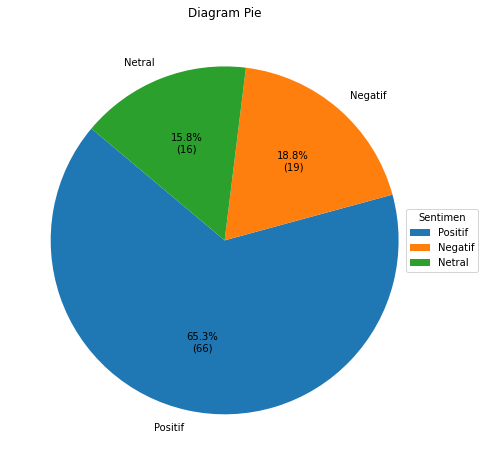

In [33]:
plt.figure(figsize=(8, 8))
plt.pie(sentimen_counts, labels=sentimen_counts.index, autopct=lambda p: '{:.1f}%\n({:.0f})'.format(p, p * sum(sentimen_counts) / 100),
        startangle=140)

plt.legend(sentimen_counts.index, title='Sentimen', loc='center', bbox_to_anchor=(1, 0.5))
plt.title('Diagram Pie')
plt.show()

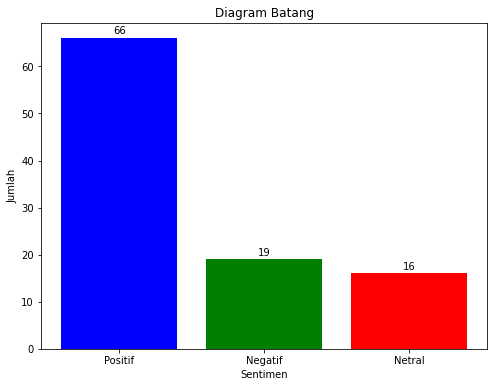

In [34]:
#sentimen count
sentimen_counts = translate['sentimen'].value_counts()
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']  #pemilihan warna (opsional)
bars = plt.bar(sentimen_counts.index, sentimen_counts.values, color=colors)
for bar, count in zip(bars, sentimen_counts.values):
    plt.text(bar.get_x() + bar.get_width() / 2, count + 0.5, str(count), ha='center', va='bottom')
    
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Diagram Batang')
plt.show()

# Kesimpulan

Berdasarkan analisis sentimen terhadap tweet yang berhasil di tarik, diperoleh hasil sebagai berikut:

1. Hasil mendapatkan sesuai target data, yakni 100 data tweet.
2. Sebagian besar tweet memiliki sentimen positif dengan jumlah 66 data.
3. Distribusi sentimen menunjukan bahwa orang-orang di Twitter cenderung lebih banyak memberikan opini positif pada topik 'Pemerintah Indonesia'.

**Pengembangan Selanjutnya**
- Menggunakan model **Machine Learning** untuk meningkatkan akurasi analisis sentimen.
- Scraping data dalam jumlah lebih besar untuk mendapatkan insight yang lebih akurat.
- Menggunakan **wordcloud** untuk melihat kata-kata yang paling sering muncul dalam setiap kategori sentimen.